# Machine Learning Layer (Individual Models per Horizon)
This notebook trains and saves separate models for each time window.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib, os
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from warnings import filterwarnings
filterwarnings("ignore")

os.makedirs('models', exist_ok=True)

/Users/anushkavaran/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---

## Creating evaluate and plot_predictions functions

In [2]:
def evaluate(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"Evaluation Metrics:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")
    return mae, rmse, r2

def plot_predictions(y_true, y_pred, title):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label='Actual', linewidth=2)
    plt.plot(y_pred, label='Predicted', linestyle='--')
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

---

## Train and Save RF and XGBoost Model: 1D


Training Random Forest for 1D
Evaluation Metrics:
MAE: 1.16
RMSE: 1.59
R²: 0.98


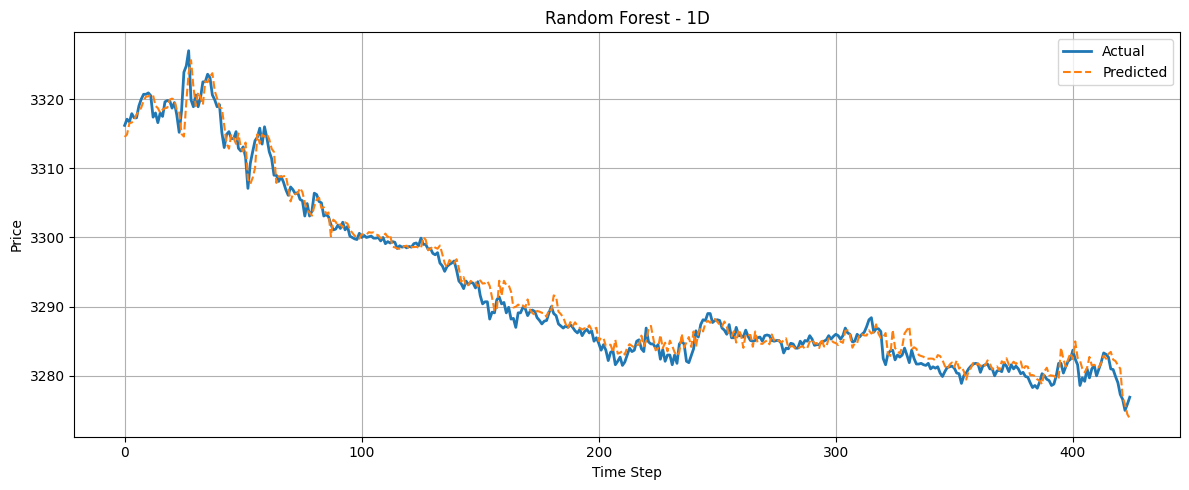


Training XGBoost for 1D
Evaluation Metrics:
MAE: 1.94
RMSE: 2.45
R²: 0.96


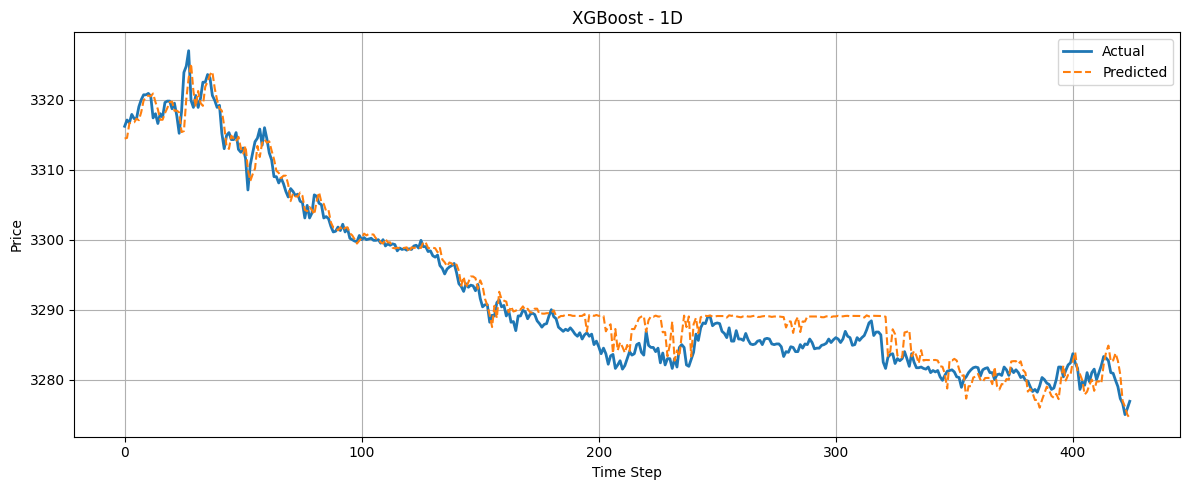

['models/xgb_1d.pkl']

In [3]:
df = pd.read_csv('data/processed/tcs_1d_features.csv')
features = ['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line', 'Lag_1', 'Lag_2', 'Lag_3']
target = 'Tomorrow'
df.dropna(subset=features + [target], inplace=True)
X, y = df[features], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
print("\nTraining Random Forest for 1D")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate(y_test, rf_pred)
plot_predictions(y_test, rf_pred, 'Random Forest - 1D')
joblib.dump(rf, 'models/rf_1d.pkl')

# Train XGBoost
print("\nTraining XGBoost for 1D")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluate(y_test, xgb_pred)
plot_predictions(y_test, xgb_pred, 'XGBoost - 1D')
joblib.dump(xgb, 'models/xgb_1d.pkl')

---

## Train and Save RF and XgBoost Model: 5D


Training Random Forest for 5D
Evaluation Metrics:
MAE: 10.01
RMSE: 11.85
R²: -0.16


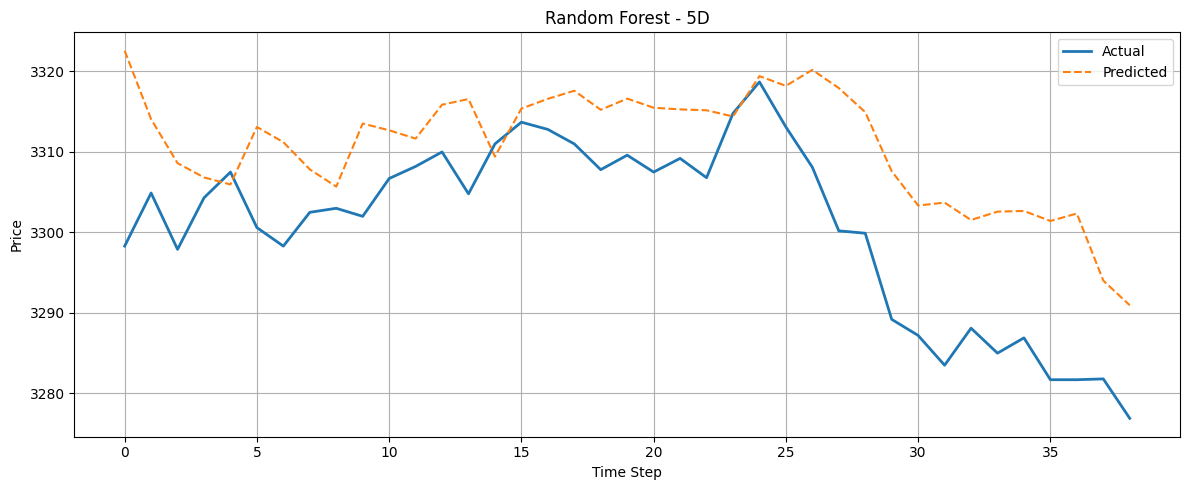


Training XGBoost for 5D
Evaluation Metrics:
MAE: 7.22
RMSE: 9.01
R²: 0.33


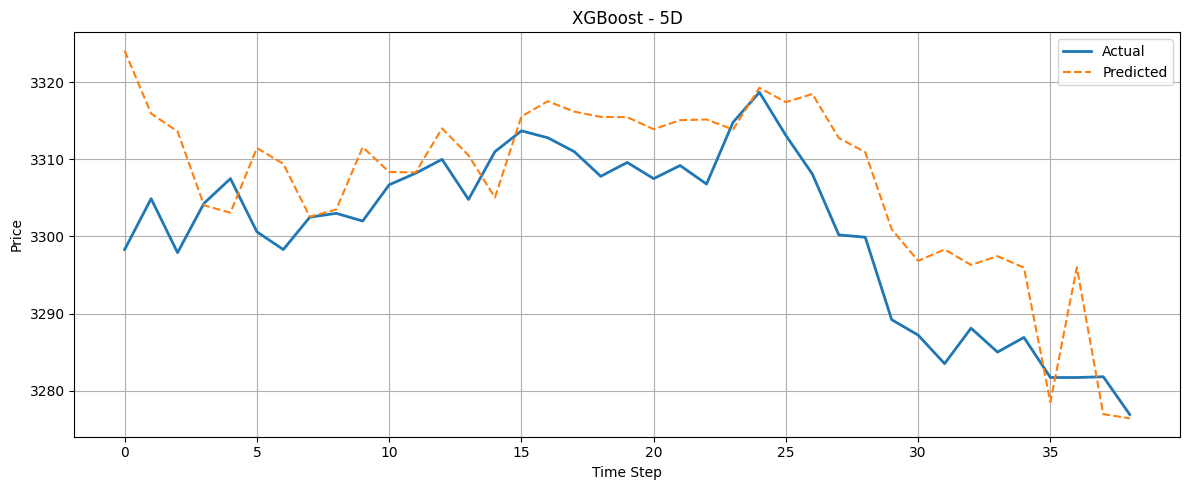

['models/xgb_5d.pkl']

In [4]:
df = pd.read_csv('data/processed/tcs_5d_features.csv')
features = ['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line', 'Lag_1', 'Lag_2']
target = 'Tomorrow'
df.dropna(subset=features + [target], inplace=True)
X, y = df[features], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
print("\nTraining Random Forest for 5D")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate(y_test, rf_pred)
plot_predictions(y_test, rf_pred, 'Random Forest - 5D')
joblib.dump(rf, 'models/rf_5d.pkl')

# Train XGBoost
print("\nTraining XGBoost for 5D")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluate(y_test, xgb_pred)
plot_predictions(y_test, xgb_pred, 'XGBoost - 5D')
joblib.dump(xgb, 'models/xgb_5d.pkl')

---

## Train and Save RF and XgBoost Model: 1M


Training Random Forest for 1M
Evaluation Metrics:
MAE: 62.19
RMSE: 75.81
R²: -1.85


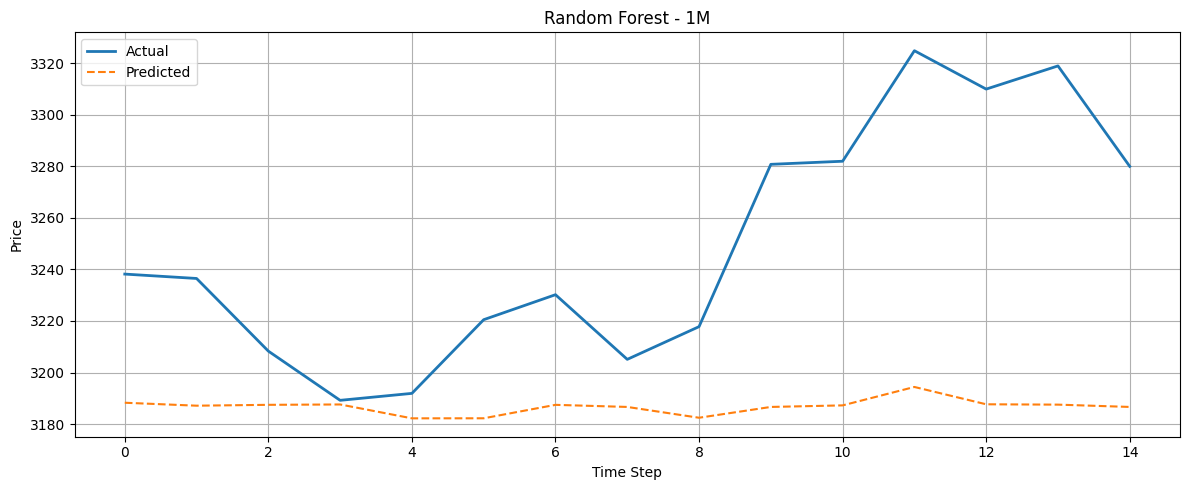


Training XGBoost for 1M
Evaluation Metrics:
MAE: 59.04
RMSE: 71.68
R²: -1.55


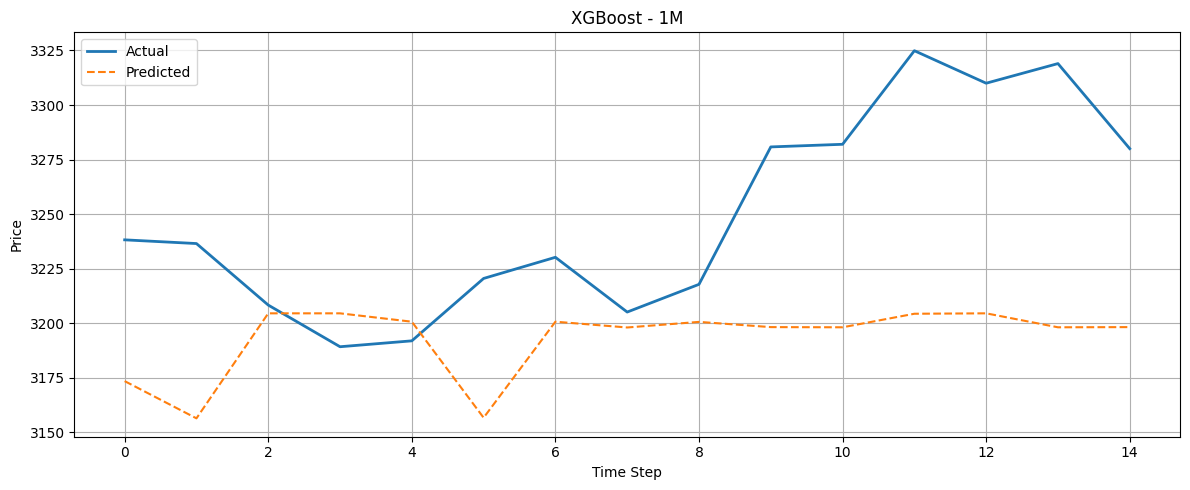

['models/xgb_1m.pkl']

In [5]:
df = pd.read_csv('data/processed/tcs_1m_features.csv')

# Define Features and Target
features = [
    'Open', 'High', 'Low', 'Volume',
    'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line',
    'Lag_1', 'Lag_2', 'Lag_3'
]
target = 'Tomorrow'

df.dropna(subset=features + [target], inplace=True)

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ─────────────────────────────────────
# Random Forest Model
print("\nTraining Random Forest for 1M")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

evaluate(y_test, rf_pred)
plot_predictions(y_test, rf_pred, 'Random Forest - 1M')
joblib.dump(rf, 'models/rf_1m.pkl')

# ─────────────────────────────────────
# XGBoost Model
print("\nTraining XGBoost for 1M")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

evaluate(y_test, xgb_pred)
plot_predictions(y_test, xgb_pred, 'XGBoost - 1M')
joblib.dump(xgb, 'models/xgb_1m.pkl')

---

## Train and Save RF and XgBoost Model: 6M


Training Random Forest for 6M

6M Evaluation Metrics:
MAE : 37.80 | RMSE: 47.62 | R²: 0.74


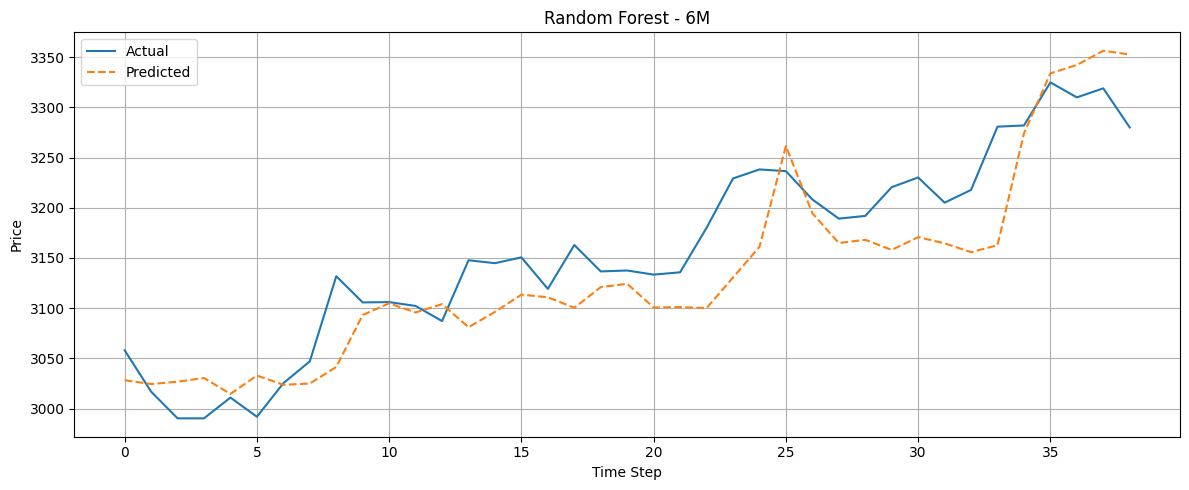


Training XGBoost for 6M

6M Evaluation Metrics:
MAE : 50.24 | RMSE: 60.67 | R²: 0.58


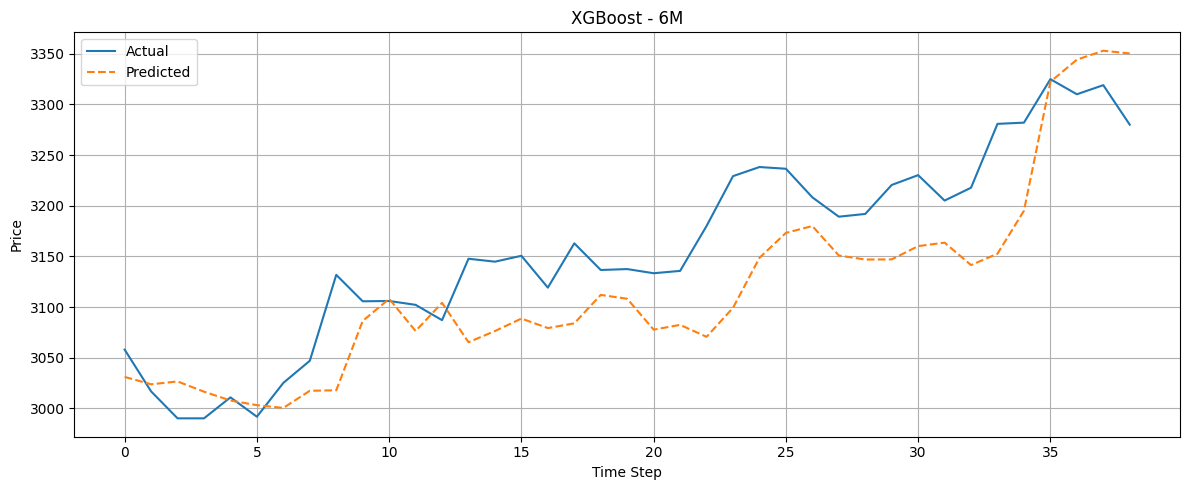

['models/xgb_6m.pkl']

In [6]:
# Load and preprocess 6M data
df = pd.read_csv('data/processed/tcs_6m_features.csv')
features = [
    'Open', 'High', 'Low', 'Volume',
    'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line',
    'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7'
]
target = 'Tomorrow'
df.dropna(subset=features + [target], inplace=True)
X, y = df[features], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Evaluation Function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n6M Evaluation Metrics:\nMAE : {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")

# Plotting Function
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true.values, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='--')
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train Random Forest
print("\nTraining Random Forest for 6M")
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate(y_test, rf_pred)
plot_predictions(y_test, rf_pred, 'Random Forest - 6M')
joblib.dump(rf, 'models/rf_6m.pkl')

# Train XGBoost
print("\nTraining XGBoost for 6M")
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6,
                   subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluate(y_test, xgb_pred)
plot_predictions(y_test, xgb_pred, 'XGBoost - 6M')
joblib.dump(xgb, 'models/xgb_6m.pkl')


---

## Train and Save LSTM Model - 1Y

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.2802 - val_loss: 0.0599 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1191 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0970 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0782 - val_loss: 0.0538 - learning_rate: 0.0010
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0730 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0729 - val_loss: 0.0553 - learning_rate: 0.0010
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0712 - val_loss: 0.0537 - learning_rate: 0.0010
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0764 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0694 - val_loss: 0.0552 - learning_rate: 0.0010
Epoch 10/100
6/6 ━━━━━━━━━━━

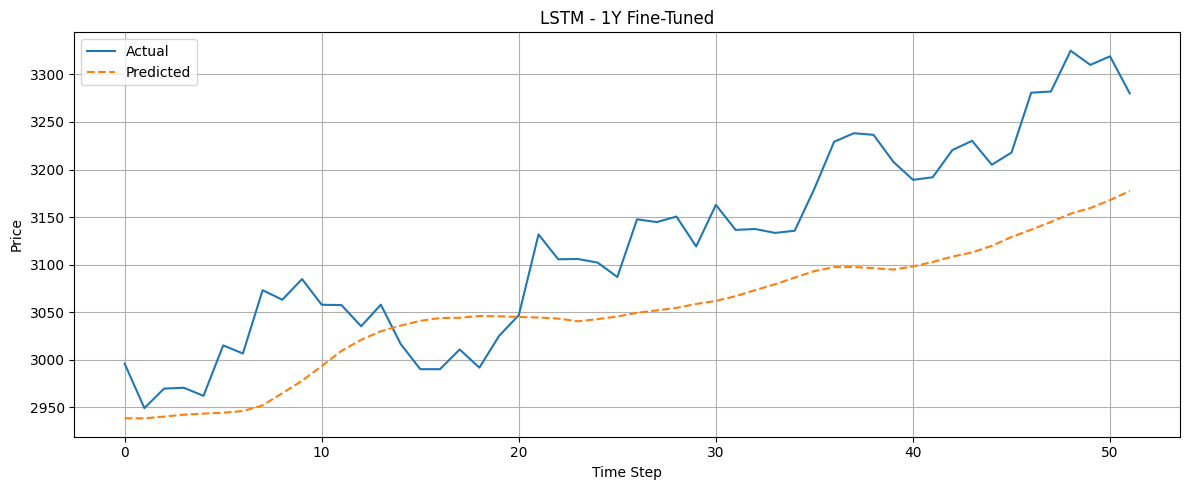

['models/y_scaler_1y_finetuned.pkl']

In [7]:
# Setup
os.makedirs('models', exist_ok=True)

# Load Data
df = pd.read_csv('data/processed/tcs_1y_features.csv')

features = [
    'Open', 'High', 'Low', 'Volume',
    'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line',
    'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7'
]
target = 'Tomorrow'

df.dropna(subset=features + [target], inplace=True)

# ─────────────────────────────────────────────
# Scale
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(df[features])
y_scaled = y_scaler.fit_transform(df[[target]])

# Sequence Generation
lookback = 180
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])
X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# ─────────────────────────────────────────────
# Fine-Tuned LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_split=0.1,
          callbacks=[early_stop, reduce_lr],
          verbose=1)

# ─────────────────────────────────────────────
# Evaluate
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)
print(f"\nLSTM (1Y Fine-Tuned) Evaluation:\nMAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('LSTM - 1Y Fine-Tuned')
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Save model and scalers
model.save('models/lstm_1y_finetuned.keras')
joblib.dump(X_scaler, 'models/X_scaler_1y_finetuned.pkl')
joblib.dump(y_scaler, 'models/y_scaler_1y_finetuned.pkl')


---

## Train and Save LSTM Model - 5Y

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.5851 - val_loss: 0.1739 - learning_rate: 0.0100
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1404 - val_loss: 0.1254 - learning_rate: 0.0100
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1125 - val_loss: 0.1229 - learning_rate: 0.0100
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0996 - val_loss: 0.2709 - learning_rate: 0.0100
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1280 - val_loss: 0.1700 - learning_rate: 0.0100
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1054 - val_loss: 0.1343 - learning_rate: 0.0100
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0944 - val_loss: 0.2264 - learning_rate: 0.0100
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1012 - val_loss: 0.1373 - learning_rate: 0.0100
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1085 - val_loss: 0.1663 - learning_rate: 0.0050
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━

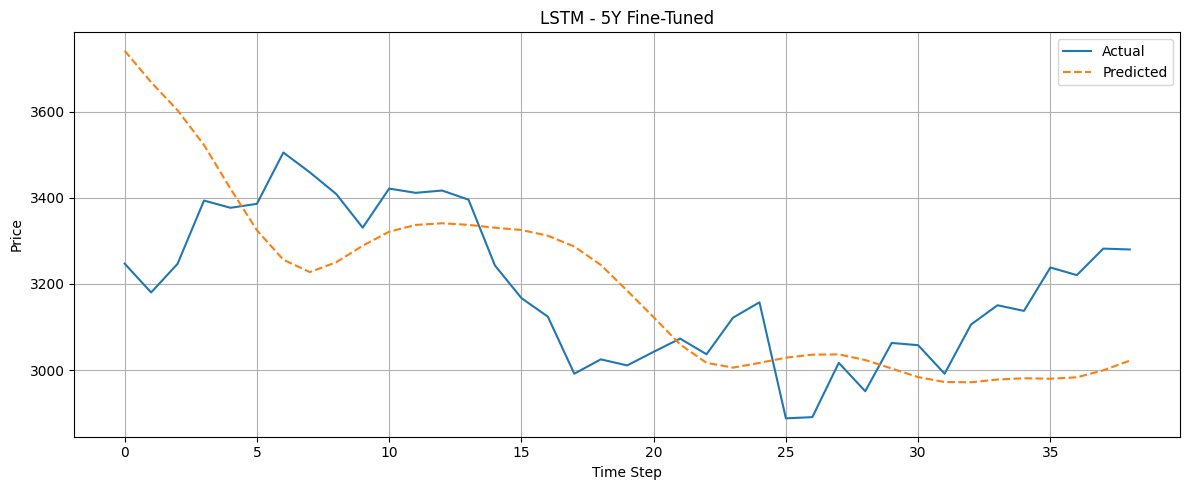

['models/y_scaler_5y_finetuned.pkl']

In [8]:
# Setup
os.makedirs('models', exist_ok=True)

# Load Data
df = pd.read_csv('data/processed/tcs_5y_features.csv')

features = [
    'Open', 'High', 'Low', 'Volume',
    'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line',
    'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7'
]
target = 'Tomorrow'

df.dropna(subset=features + [target], inplace=True)

# ─────────────────────────────────────────────
# Scale
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(df[features])
y_scaled = y_scaler.fit_transform(df[[target]])

# Sequence Generation
lookback = 12 # 20 weeks
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])
X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# ─────────────────────────────────────────────
# Fine-Tuned LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_split=0.1,
          callbacks=[early_stop, reduce_lr],
          verbose=1)

# ─────────────────────────────────────────────
# Evaluate
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)
print(f"\nLSTM (5Y Fine-Tuned) Evaluation:\nMAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('LSTM - 5Y Fine-Tuned')
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Save model and scalers
model.save('models/lstm_5y_finetuned.keras')
joblib.dump(X_scaler, 'models/X_scaler_5y_finetuned.pkl')
joblib.dump(y_scaler, 'models/y_scaler_5y_finetuned.pkl')


---